# Cats and Dogs Classifier

In [1]:
import tensorflow as tf
#tf.config.set_visible_devices([], 'GPU')

def enable_gpu_memory_growth(gpus_physical):
    if gpus_physical:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus_physical:
                tf.config.experimental.set_memory_growth(gpu, True)
            gpus_logical = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus_physical), "Physical GPUs,", len(gpus_logical), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)

gpus = tf.config.list_physical_devices('GPU')
enable_gpu_memory_growth(gpus)

1 Physical GPUs, 1 Logical GPUs


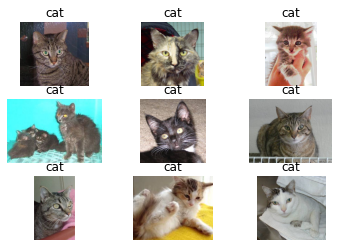

In [2]:
import matplotlib.pyplot as plt


path = '../data/train/cats/'
from os import listdir
imagesList = listdir(path)
for i, image in enumerate(imagesList[0:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(path + image))
    plt.title('cat')
    plt.axis("off")

### Initial model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense

model = Sequential(
    [
        Input(shape=(150,150,3)),

        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),

        Flatten(),
        Dense(64,activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid'),
    ])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '../data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '../data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Fit

In [5]:
model.fit(train_generator,
          epochs=5,
          batch_size=batch_size,
          validation_data=validation_generator,
          verbose=2)
model.save_weights('../models/model.h5')  # always save your weights after training or during training

Epoch 1/5
63/63 - 17s - loss: 0.7283 - accuracy: 0.5410 - val_loss: 0.6746 - val_accuracy: 0.5038
Epoch 2/5
63/63 - 8s - loss: 0.6827 - accuracy: 0.6050 - val_loss: 0.6495 - val_accuracy: 0.6425
Epoch 3/5
63/63 - 8s - loss: 0.6561 - accuracy: 0.6150 - val_loss: 0.6361 - val_accuracy: 0.6500
Epoch 4/5
63/63 - 9s - loss: 0.6368 - accuracy: 0.6350 - val_loss: 0.6145 - val_accuracy: 0.6463
Epoch 5/5
63/63 - 8s - loss: 0.6107 - accuracy: 0.6820 - val_loss: 0.6173 - val_accuracy: 0.6662
